In [33]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Creating function to collet tickers of ETF
def identifying_assets():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    data = pd.read_html(url)
    table = data[0]
    ticks = table.head(500)['Symbol'].tolist()
    return ticks

In [35]:
# retrieving the data and cleaning it 
etfs = ['IWM', 'DIA']
spy_tickers = identifying_assets()
Data = yf.download(spy_tickers, period='10y')['Adj Close']
data_etfs = yf.download(etfs, period= '10y')['Adj Close']
Volume_Data = yf.download(spy_tickers, period='5y')['Volume']


# Cleaning data
Data = Data.drop(columns=['BF.B', 'BRK.B', 'AXON', 'ABNB'], errors='ignore')
Volume_Data = Volume_Data.dropna(axis=1)

# Calculate returns
returns = Data.pct_change().dropna()
ann_returns = returns[-252:]
returns.index = pd.to_datetime(returns.index)

[*********************100%%**********************]  500 of 500 completed


2 Failed downloads:
['BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=10y)')



[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  500 of 500 completed


2 Failed downloads:
['BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=5y)')


In [36]:
Data.isna().sum()

A       0
AAL     0
AAPL    0
ABBV    0
ABT     0
       ..
XOM     0
XRAY    0
XYL     0
YUM     0
ZBRA    0
Length: 496, dtype: int64

In [37]:
Data.index = pd.to_datetime(Data.index)

# Making sure that output is correct and data looks good
Data

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WST,WTW,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-13,38.720978,27.009542,16.773930,33.342976,32.426731,18.379999,68.068718,58.599998,39.215767,31.704397,...,46.813843,98.225235,20.522070,172.508636,20.474398,64.099068,44.450497,30.760225,43.631729,53.660000
2014-01-14,39.345203,27.216949,17.107698,33.858200,32.808121,18.490000,68.816086,60.369999,39.889812,32.315132,...,47.735474,98.849327,20.763664,176.010162,20.532808,64.469818,44.836956,31.252119,43.524734,54.599998
2014-01-15,39.647453,27.188662,17.451174,33.530331,32.774967,18.299999,70.722313,61.680000,40.138584,32.406723,...,47.954006,99.250519,20.837482,178.129761,20.459793,64.248672,44.450497,31.946016,43.709927,54.619999
2014-01-16,39.752579,27.660038,17.353798,33.791290,32.783245,18.320000,70.638313,61.630001,39.978096,31.490641,...,48.467083,98.737854,20.918009,178.121307,20.591225,64.352722,44.404495,32.183167,43.190201,54.189999
2014-01-17,39.890553,28.301098,16.928600,33.496868,32.667175,18.213333,70.898636,61.369999,39.625019,31.307405,...,47.819725,98.871597,20.783792,182.877609,20.591225,64.495827,44.073261,32.121685,43.070740,53.869999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-04,131.000000,13.090000,181.910004,161.460007,110.980003,77.470001,337.089996,567.049988,186.070007,71.750000,...,340.320007,239.490005,33.590000,94.209999,63.730000,102.320000,35.680000,112.330002,128.690002,252.970001
2024-01-05,130.559998,13.600000,181.179993,162.139999,110.800003,76.809998,336.619995,564.599976,186.550003,70.809998,...,339.480011,238.869995,33.680000,95.650002,63.730000,102.629997,35.380001,112.150002,128.339996,252.690002
2024-01-08,133.380005,14.580000,185.559998,161.429993,112.400002,77.120003,340.350006,580.549988,188.979996,71.059998,...,351.850006,242.169998,34.049999,97.050003,63.580002,100.919998,35.900002,112.849998,128.639999,261.089996


In [38]:
# Creating dataframe for the first table
output_1 = pd.DataFrame(index= spy_tickers)

# calculating the weight for equal weight
output_1['Weight'] = 100 / len(spy_tickers)

# Calculating Annual Volatility for each stock
annual_volatility = returns[-63:].std() * (252 * (1/2))  
output_1['Annual Volatility'] = annual_volatility.reindex(output_1.index)  

# Calculate returns for ETFs
etf_returns = data_etfs.pct_change().dropna()

for etf in etfs:
    # Initialize an empty DataFrame to store beta values
    beta_values = pd.Series(index=returns.columns)

    # Calculate variance of the ETF returns
    var_etf = etf_returns[etf].var()

    # Iterate over each stock ticker
    for ticker in returns.columns:
        # Calculate covariance of the stock returns with the ETF returns
        cov = returns[ticker].cov(etf_returns[etf])

        # Calculate beta for each stock
        beta_values[ticker] = cov / var_etf

    # Add the beta values to the output_1 DataFrame
    output_1['Beta_' + etf] = beta_values

# weekly average drawdown
output_1['Average Drawdown'] = ((Data.rolling(5).min() - Data.rolling(5).max()) / Data.rolling(5).max()).mean()

# weekly maximum drawdown
output_1['Maximum Drawdown'] =  ((Data.rolling(5).min() -  Data.rolling(5).max()) / Data.rolling(5).max()).max()

# Total return of ETF
output_1['Total Return'] = total_return = (Data.iloc[-1] / Data.iloc[0] - 1) * 100


In [39]:
output_1

,Weight,Annual Volatility,Beta_IWM,Beta_DIA,Average Drawdown,Maximum Drawdown,Total Return
MMM,0.2,1.773895,0.702584,0.460523,-0.027060,-0.001753,11.511593
AOS,0.2,2.000652,0.674319,0.395910,-0.033301,-0.001628,264.050140
ABT,0.2,1.546434,0.232543,0.142475,-0.027849,-0.002233,252.795356
ABBV,0.2,1.434409,0.150268,0.250924,-0.031879,-0.002259,394.526947
ACN,0.2,1.357804,0.500573,0.358498,-0.027705,-0.002635,407.325534
...,...,...,...,...,...,...,...
WYNN,0.2,2.443508,0.740039,0.436417,-0.057674,-0.004723,-45.724458
XEL,0.2,1.489578,0.389193,0.320559,-0.024648,-0.002458,206.333804
XYL,0.2,1.593384,0.576433,0.344704,-0.032082,-0.002267,264.886787
YUM,0.2,1.209465,0.346611,0.233660,-0.026822,-0.001079,196.114776


In [40]:
class EF_MC:
    def __init__(self, stocks):
        self.stocks = stocks
        self.mean_returns = None
        self.covariance_matrix = None
        self.correlation_matrix = None
        self.results = None
        self.optimal_weights = None

    def phase_1(self):
        Data.dropna(axis=1, inplace=True)
    
        # Update the list of stocks in the class instance to match the processed data
        self.stocks = Data.columns.tolist()

        # Recalculate returns
        returns = Data.pct_change().dropna()
    
        # Store the mean returns, covariance matrix, and correlation matrix in the class instance
        self.mean_returns = returns.mean()
        self.covariance_matrix = returns.cov()
        self.correlation_matrix = returns.corr()

    def phase_2(self, num_portfolios=10000):
        num_stocks = len(self.stocks)
        results = np.zeros((3 + num_stocks, num_portfolios))
        risk_free_rate = 0.0486
    
        for i in range(num_portfolios):
            weights = np.random.dirichlet(np.ones(num_stocks), size=1).flatten()
            portfolio_return = np.sum(weights * self.mean_returns) * 252
            portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(self.covariance_matrix * 252, weights)))
            results[0, i] = portfolio_return
            results[1, i] = portfolio_std_dev
            results[2, i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
            results[3:, i] = weights

        self.results = results
        max_sharpe_idx = np.argmax(results[2])
        self.optimal_weights = results[3:, max_sharpe_idx]

    def print_optimal_portfolio(self):
        print("Optimal Portfolio Weights:")
        for stock, weight in zip(self.stocks, self.optimal_weights):
            print(f"{stock}: {weight:.2%}")

    def plot_efficient_frontier(self):
        plt.figure(figsize=(10, 5))
        plt.scatter(self.results[1, :], self.results[0, :], c=self.results[2, :], cmap='YlGnBu', marker='o')
        plt.title('Efficient Frontier')
        plt.xlabel('Risk Standard Deviation')
        plt.ylabel('Return')
        plt.colorbar(label='Sharpe Ratio')
        plt.savefig('efficient_frontier.png')
        plt.show()


Optimal Portfolio Weights:
A: 0.11%
AAL: 0.11%
AAPL: 0.22%
ABBV: 0.21%
ABT: 0.12%
ACGL: 0.11%
ACN: 0.00%
ADBE: 0.09%
ADI: 0.53%
ADM: 0.50%
ADP: 0.01%
ADSK: 0.09%
AEE: 0.06%
AEP: 0.04%
AES: 0.02%
AFL: 0.15%
AIG: 0.07%
AIZ: 0.04%
AJG: 0.72%
AKAM: 0.05%
ALB: 0.09%
ALGN: 0.19%
ALL: 0.10%
ALLE: 0.23%
AMAT: 0.11%
AMCR: 0.00%
AMD: 0.11%
AME: 0.07%
AMGN: 0.38%
AMP: 0.09%
AMT: 0.28%
AMZN: 0.44%
ANSS: 0.10%
AON: 0.11%
AOS: 0.29%
APA: 0.08%
APD: 0.15%
APH: 0.31%
APTV: 0.02%
ARE: 0.11%
ATO: 0.25%
AVB: 0.07%
AVGO: 0.11%
AVY: 0.04%
AWK: 0.14%
AXP: 0.02%
AZO: 0.14%
BA: 0.19%
BAC: 0.26%
BALL: 0.31%
BAX: 0.07%
BBWI: 0.42%
BBY: 0.11%
BDX: 0.29%
BEN: 0.14%
BG: 0.16%
BIIB: 0.19%
BIO: 0.09%
BK: 0.25%
BKNG: 0.11%
BKR: 0.01%
BLDR: 0.78%
BLK: 0.02%
BMY: 0.10%
BR: 0.02%
BRO: 0.09%
BSX: 0.16%
BWA: 0.03%
BX: 0.15%
BXP: 0.11%
C: 0.34%
CAG: 0.28%
CAH: 0.12%
CAT: 0.23%
CB: 0.23%
CBOE: 0.03%
CBRE: 0.10%
CCI: 0.55%
CCL: 0.65%
CDNS: 0.19%
CDW: 0.31%
CE: 0.09%
CF: 0.16%
CHD: 0.01%
CHRW: 0.03%
CHTR: 0.87%
CI: 0.23%
CINF

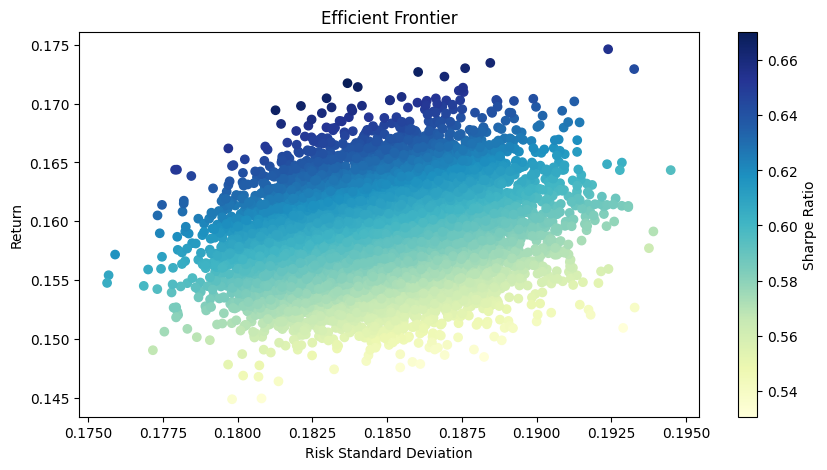

In [41]:
# Instantiate the class with the initial list of tickers
ef_mc = EF_MC(spy_tickers)

# Download data and compute statistics
ef_mc.phase_1()

# Now you can continue with the rest of the analysis
ef_mc.phase_2(num_portfolios=10000)
ef_mc.print_optimal_portfolio()
ef_mc.plot_efficient_frontier()



In [42]:
# Class for calculating price momentum factors
class PriceMomentumCalculator:
    def __init__(self, data):
        self.data = data.tail(280).head(260)  
    def slope_52_week(self):
        return self.data.apply(lambda x: np.polyfit(range(len(x)), x, 1)[0])

    def percent_above_260day_low(self):
        min_prices = self.data.min()
        last_prices = self.data.iloc[-1]
        return (last_prices - min_prices) / min_prices * 100

    def price_oscillator(self):
        mean_20 = self.data.tail(20).mean()
        overall_mean = self.data.mean()
        return (mean_20 - overall_mean) / overall_mean * 100

In [43]:
# Function for calculating 39-week return
def _39week_return(data):
    recent_data = data.tail(299).head(195)
    return (recent_data.iloc[-1] - recent_data.iloc[0]) / recent_data.iloc[0] * 100

In [44]:
# Class for asset selection
class AssetSelection:
    def __init__(self, data, pm_calculator, volume_data):
        self.data = data
        self.pm_calculator = pm_calculator
        self.volume_data = volume_data

    def volume_price_trend(self):
        price_data = self.data.tail(272).head(255)
        vol_data = self.volume_data.tail(272).head(255)
        return ((price_data.diff() * vol_data).cumsum()).iloc[-1]

    def select_assets(self):
        scores = pd.DataFrame({
            'slope_52_week': self.pm_calculator.slope_52_week(),
            'percent_above_260day_low': self.pm_calculator.percent_above_260day_low(),
            'price_oscillator': self.pm_calculator.price_oscillator(),
            'week_39_return': _39week_return(self.data),
            'volume_price_trend': self.volume_price_trend()
        })

        combined_scores = scores.mean(axis=1)
        sorted_scores = combined_scores.sort_values(ascending=False)

        long_basket = sorted_scores.head(15).index.tolist()
        short_basket = sorted_scores.tail(15).index.tolist()

        return long_basket, short_basket

In [50]:
# Class for calculating price momentum factors
class PriceMomentumCalculator:
    def __init__(self, data):
        self.data = data.tail(280).head(260)  
    def slope_52_week(self):
        return self.data.apply(lambda x: np.polyfit(range(len(x)), x, 1)[0])
    def percent_above_260day_low(self):
        min_prices = self.data.min()
        last_prices = self.data.iloc[-1]
        return (last_prices - min_prices) / min_prices * 100
    def price_oscillator(self):
        mean_20 = self.data.tail(20).mean()
        overall_mean = self.data.mean()
        return (mean_20 - overall_mean) / overall_mean * 100

# Function for calculating 39-week return
def _39week_return(data):
    recent_data = data.tail(299).head(195)
    return (recent_data.iloc[-1] - recent_data.iloc[0]) / recent_data.iloc[0] * 100

# Class for asset selection
class AssetSelection:
    def __init__(self, data, pm_calculator, volume_data):
        self.data = data
        self.pm_calculator = pm_calculator
        self.volume_data = volume_data
    def volume_price_trend(self):
        price_data = self.data.tail(272).head(255)
        vol_data = self.volume_data.tail(272).head(255)
        return ((price_data.diff() * vol_data).cumsum()).iloc[-1]
    def select_assets(self):
        scores = pd.DataFrame({
            'slope_52_week': self.pm_calculator.slope_52_week(),
            'percent_above_260day_low': self.pm_calculator.percent_above_260day_low(),
            'price_oscillator': self.pm_calculator.price_oscillator(),
            'week_39_return': _39week_return(self.data),
            'volume_price_trend': self.volume_price_trend()
        })
        combined_scores = scores.mean(axis=1)
        sorted_scores = combined_scores.sort_values(ascending=False)
        long_basket = sorted_scores.head(15).index.tolist()
        short_basket = sorted_scores.tail(15).index.tolist()
        return long_basket, short_basket

# Backtest class
class Backtest:
    def __init__(self, data, volume_data, asset_selector):
        self.data = data
        self.volume_data = volume_data
        self.asset_selector = asset_selector
    def calculate_monthly_returns(self, start_date, end_date):
        long_basket, short_basket = self.asset_selector.select_assets()
        long_basket = [asset for asset in long_basket if asset in self.data.columns]
        short_basket = [asset for asset in short_basket if asset in self.data.columns]
        monthly_data = self.data.loc[start_date:end_date]
        monthly_returns_data = monthly_data.pct_change().dropna()
        long_weight = 1 / len(long_basket) if long_basket else 0
        short_weight = -1 / len(short_basket) if short_basket else 0
        long_return = short_return = etf_return = 0
        if not monthly_returns_data.empty:
            if long_basket:
                long_return = (monthly_returns_data[long_basket] * long_weight).sum(axis=1).iloc[-1]
            if short_basket:
                short_return = (monthly_returns_data[short_basket] * short_weight).sum(axis=1).iloc[-1]
            total_return = long_return + short_return
            etf_return = monthly_data.mean(axis=1).pct_change().dropna().iloc[-1]
            return total_return, long_return, short_return, etf_return
        return 0, 0, 0, 0  # No returns for empty data
    def backtest_portfolio(self):
        results = []
        for month_end in pd.date_range(start=self.data.index.min(), end=self.data.index.max(), freq='M'):
            month_start = month_end - pd.offsets.MonthBegin(1)
            total_return, long_return, short_return, etf_return = self.calculate_monthly_returns(month_start, month_end)
            results.append({
                'date': month_end,
                'total_return': total_return,
                'long_return': long_return,
                'short_return': short_return,
                'etf_return': etf_return
            })
        return pd.DataFrame(results)

In [57]:
# Initialize the classes and run the backtest
pm_calculator = PriceMomentumCalculator(Data)
asset_selector = AssetSelection(Data, pm_calculator, Volume_Data)
backtest = Backtest(Data, Volume_Data, asset_selector)

# Run the backtest
backtest_results = backtest.backtest_portfolio()


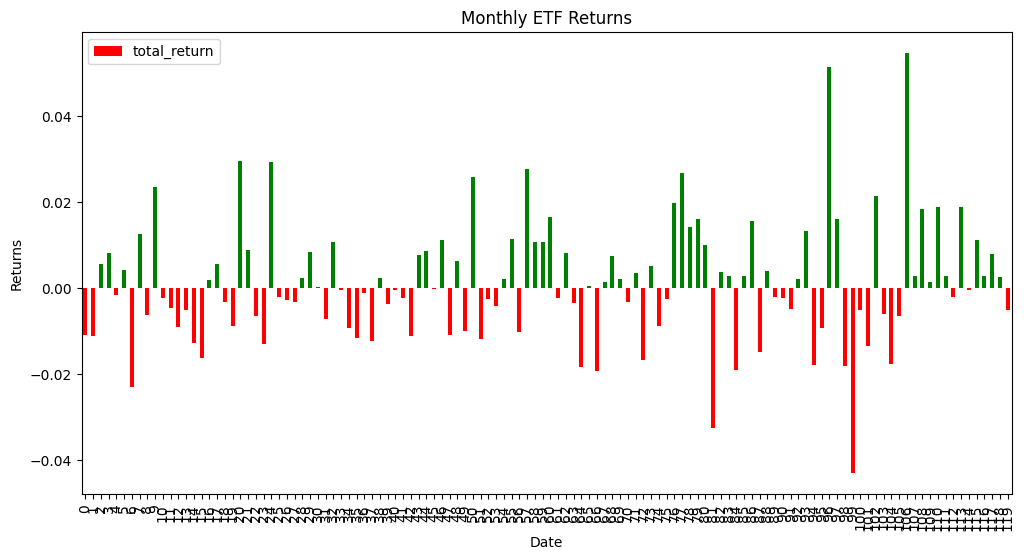

In [58]:
backtest_results['monthly_etf_return'] = backtest_results['etf_return'].cumsum()

plt.figure(figsize=(12, 6))
backtest_results['total_return'].plot(kind='bar', color=backtest_results['total_return'].apply(lambda x: 'g' if x >= 0 else 'r'))
plt.title('Monthly ETF Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()



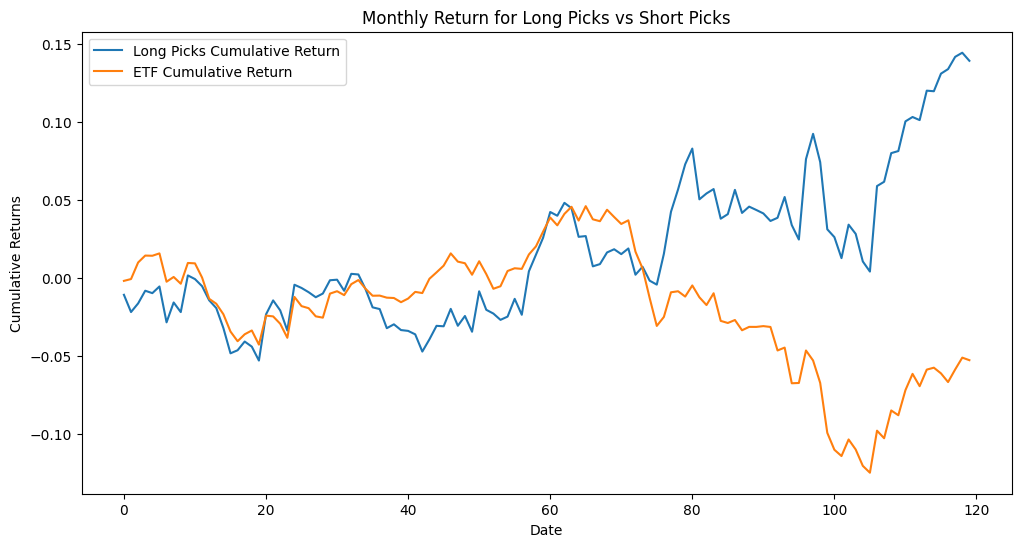

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(backtest_results['long_return'].cumsum(), label='Long Picks Cumulative Return')
plt.plot(backtest_results['monthly_etf_return'], label='ETF Cumulative Return')
plt.title('Monthly Return for Long Picks vs Short Picks')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

